In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
display(train.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- missing value! Above the information, a lot of missing value

In [6]:
# target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Data Preprocessing

1. missing value

In [7]:
missing = train.isnull().sum().sort_values(ascending = False)

In [8]:
missing_percent = missing/1460
missing_percent_df = pd.DataFrame({'Total':missing,'percent':missing_percent})
missing_percent_df.head(20)

,Total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [9]:
#new 
train['Electrical'].fillna('SBrkr', inplace = True)

/tmp/ipykernel_18/1866662938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Electrical'].fillna('SBrkr', inplace = True)


In [10]:
for col in ['Alley','Fence','MiscFeature','PoolQC','MasVnrType','FireplaceQu',
           'GarageCond','GarageType','GarageFinish','GarageQual',
           'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond', 'BsmtFinType1']:
    train[col].fillna('None', inplace = True)

/tmp/ipykernel_18/3955496882.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('None', inplace = True)


In [11]:
#new 
median_value = train['LotFrontage'].median()
train['LotFrontage'].fillna(median_value , inplace = True)
train['GarageYrBlt'].fillna(0,inplace = True)
train['MasVnrArea'].fillna(0,inplace = True)

/tmp/ipykernel_18/3519494007.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LotFrontage'].fillna(median_value , inplace = True)
/tmp/ipykernel_18/3519494007.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [12]:
# train.drop(['PoolQC','MiscFeature','Alley'],axis = 1,inplace = True)
# test.drop(['PoolQC','MiscFeature','Alley'],axis = 1,inplace = True)

2. Categorical_data and Numerical_data

In [13]:
categorical_data = [k for k in train.columns if train[k].dtype == 'object']
numerical_data = [y for y in train.columns if train[y].dtype != 'object']

> observe categorical_data

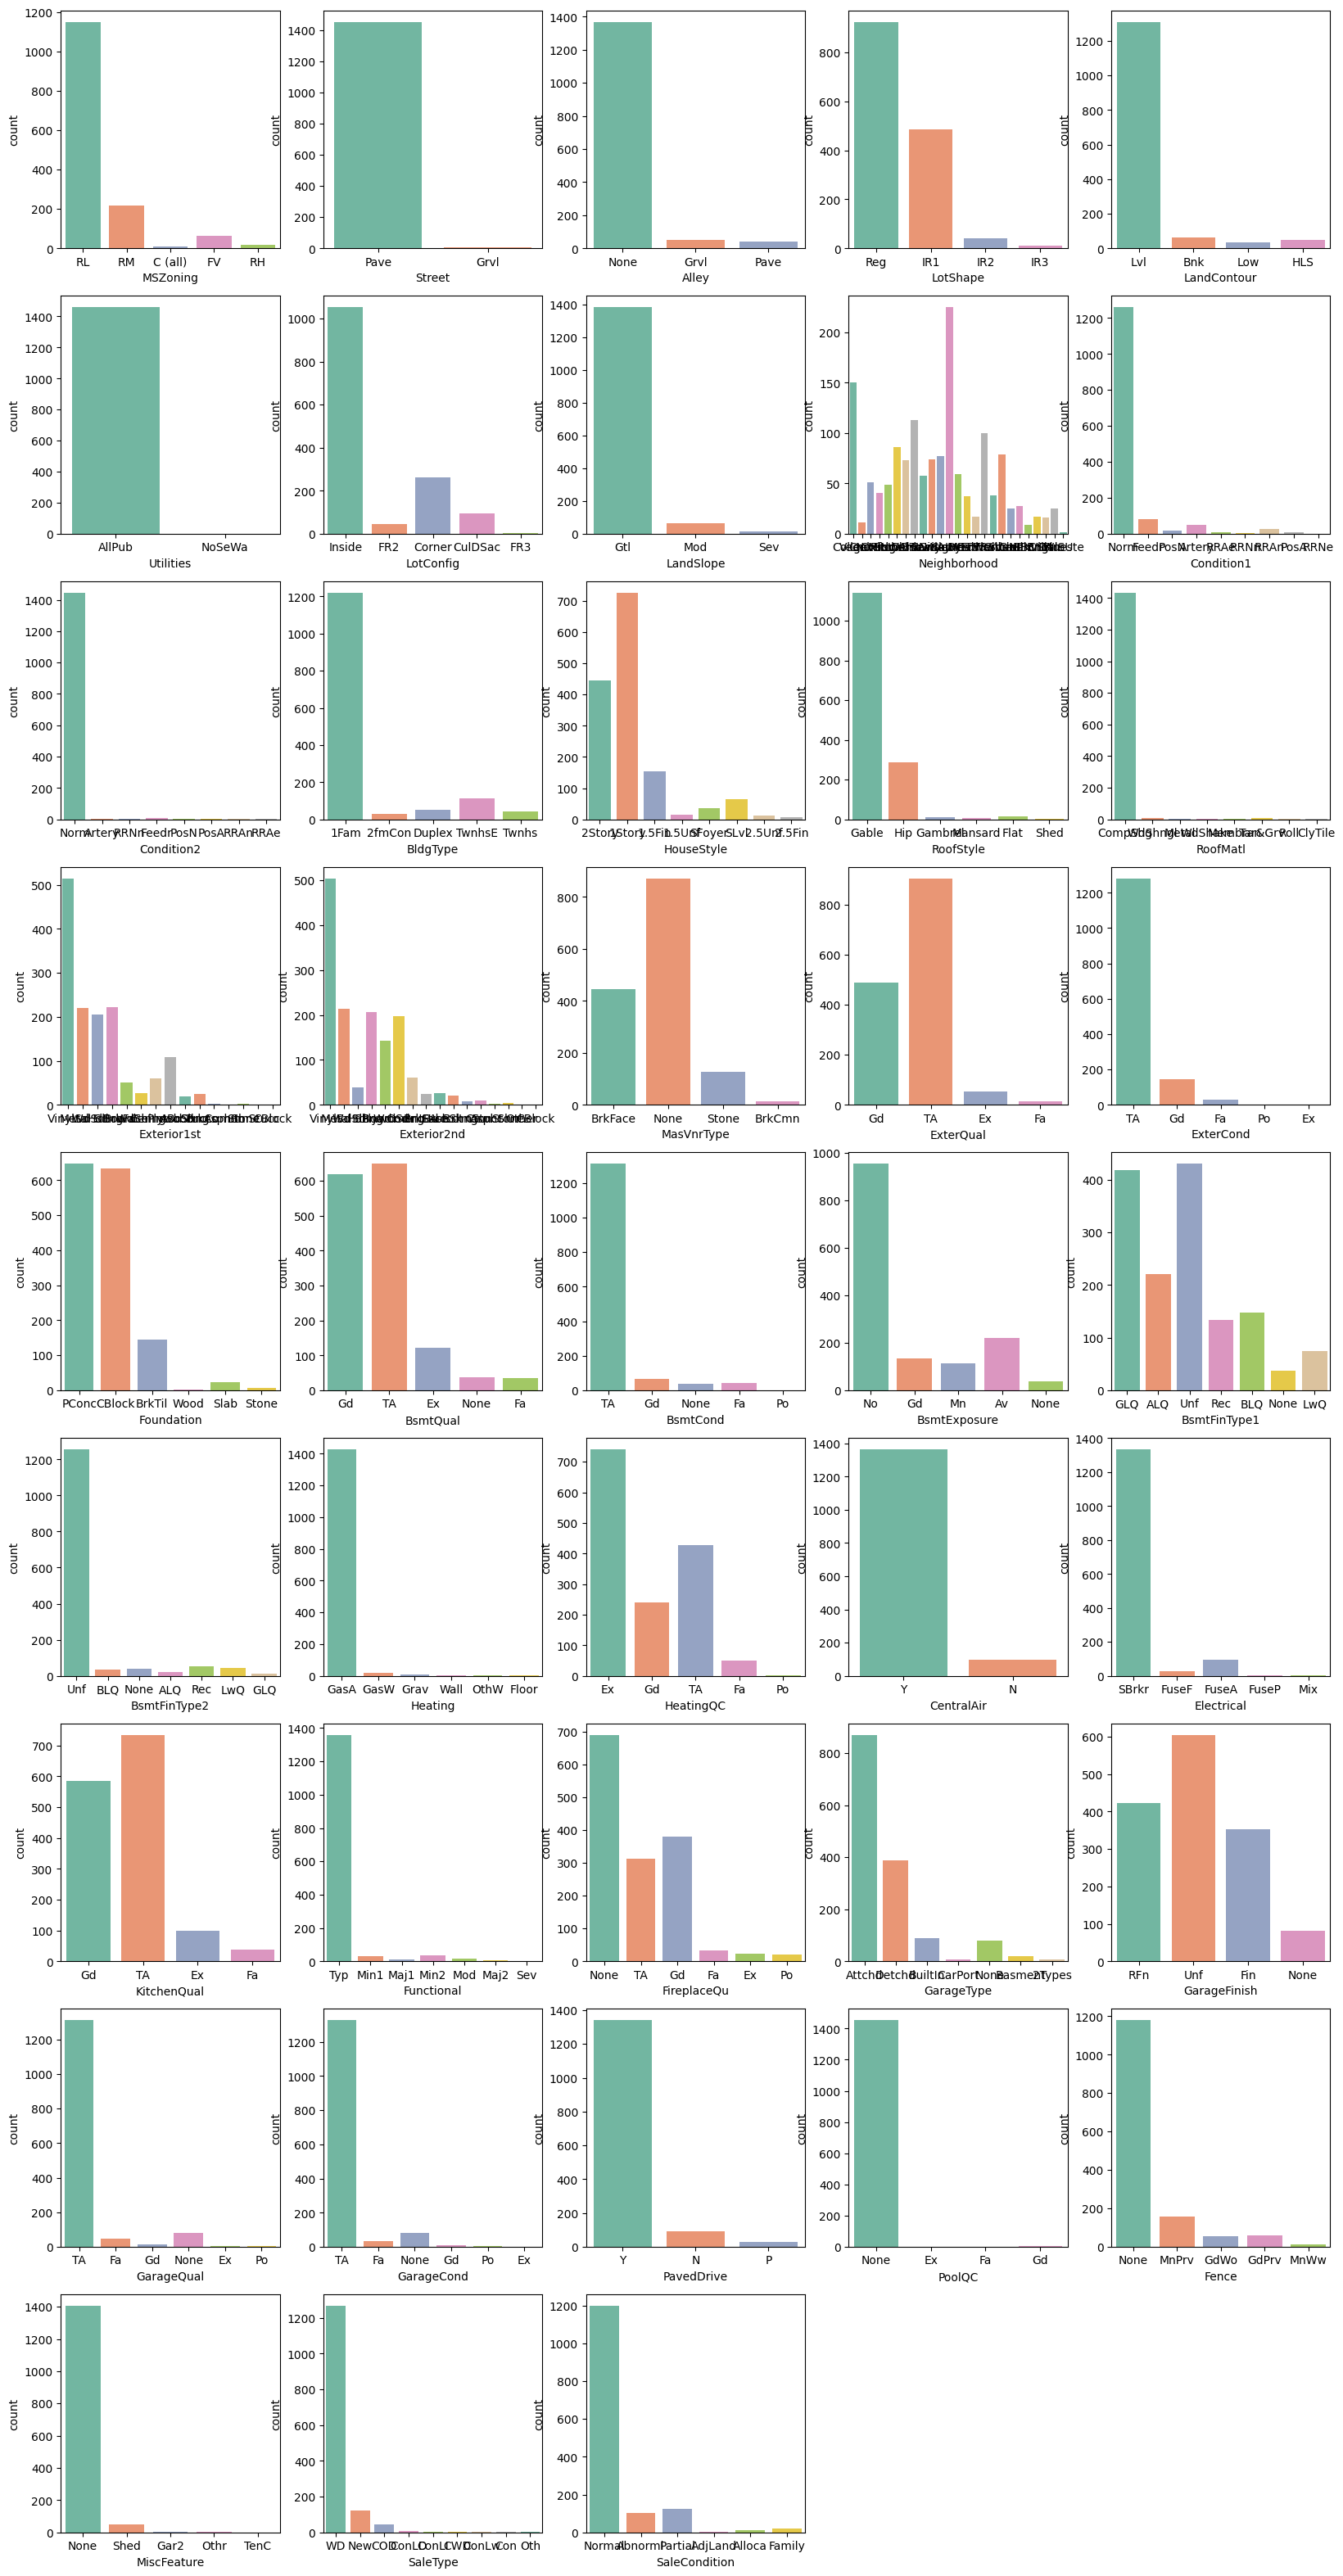

In [14]:
plt.figure(figsize = (20,40))
for i, columns in enumerate(categorical_data, start=1):
    plt.subplot(9,5,i)
    sns.countplot(x = columns , data = train , palette = 'Set2')
plt.show()

In [15]:
# train.drop(['Street','Utilities','LandContour','Condition1','Condition2',
#            'LandSlope','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2',
#            'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
#            'SaleType','SaleCondition','Id','RoofStyle','PavedDrive'],axis = 1 ,inplace = True)
# test.drop(['Street','Utilities','LandContour','Condition1','Condition2',
#            'LandSlope','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2',
#            'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
#            'SaleType','SaleCondition','Id','RoofStyle','PavedDrive'],axis = 1 ,inplace = True)
train.drop(['Street','Utilities','Condition2','RoofMatl',
           'Heating','Functional','PoolQC','MiscFeature'],axis = 1 ,inplace = True)
test.drop(['Street','Utilities','Condition2','RoofMatl',
           'Heating','Functional','PoolQC','MiscFeature'],axis = 1 ,inplace = True)

> observe outlier

In [16]:
categorical_data = [k for k in train.columns if train[k].dtype == 'object']

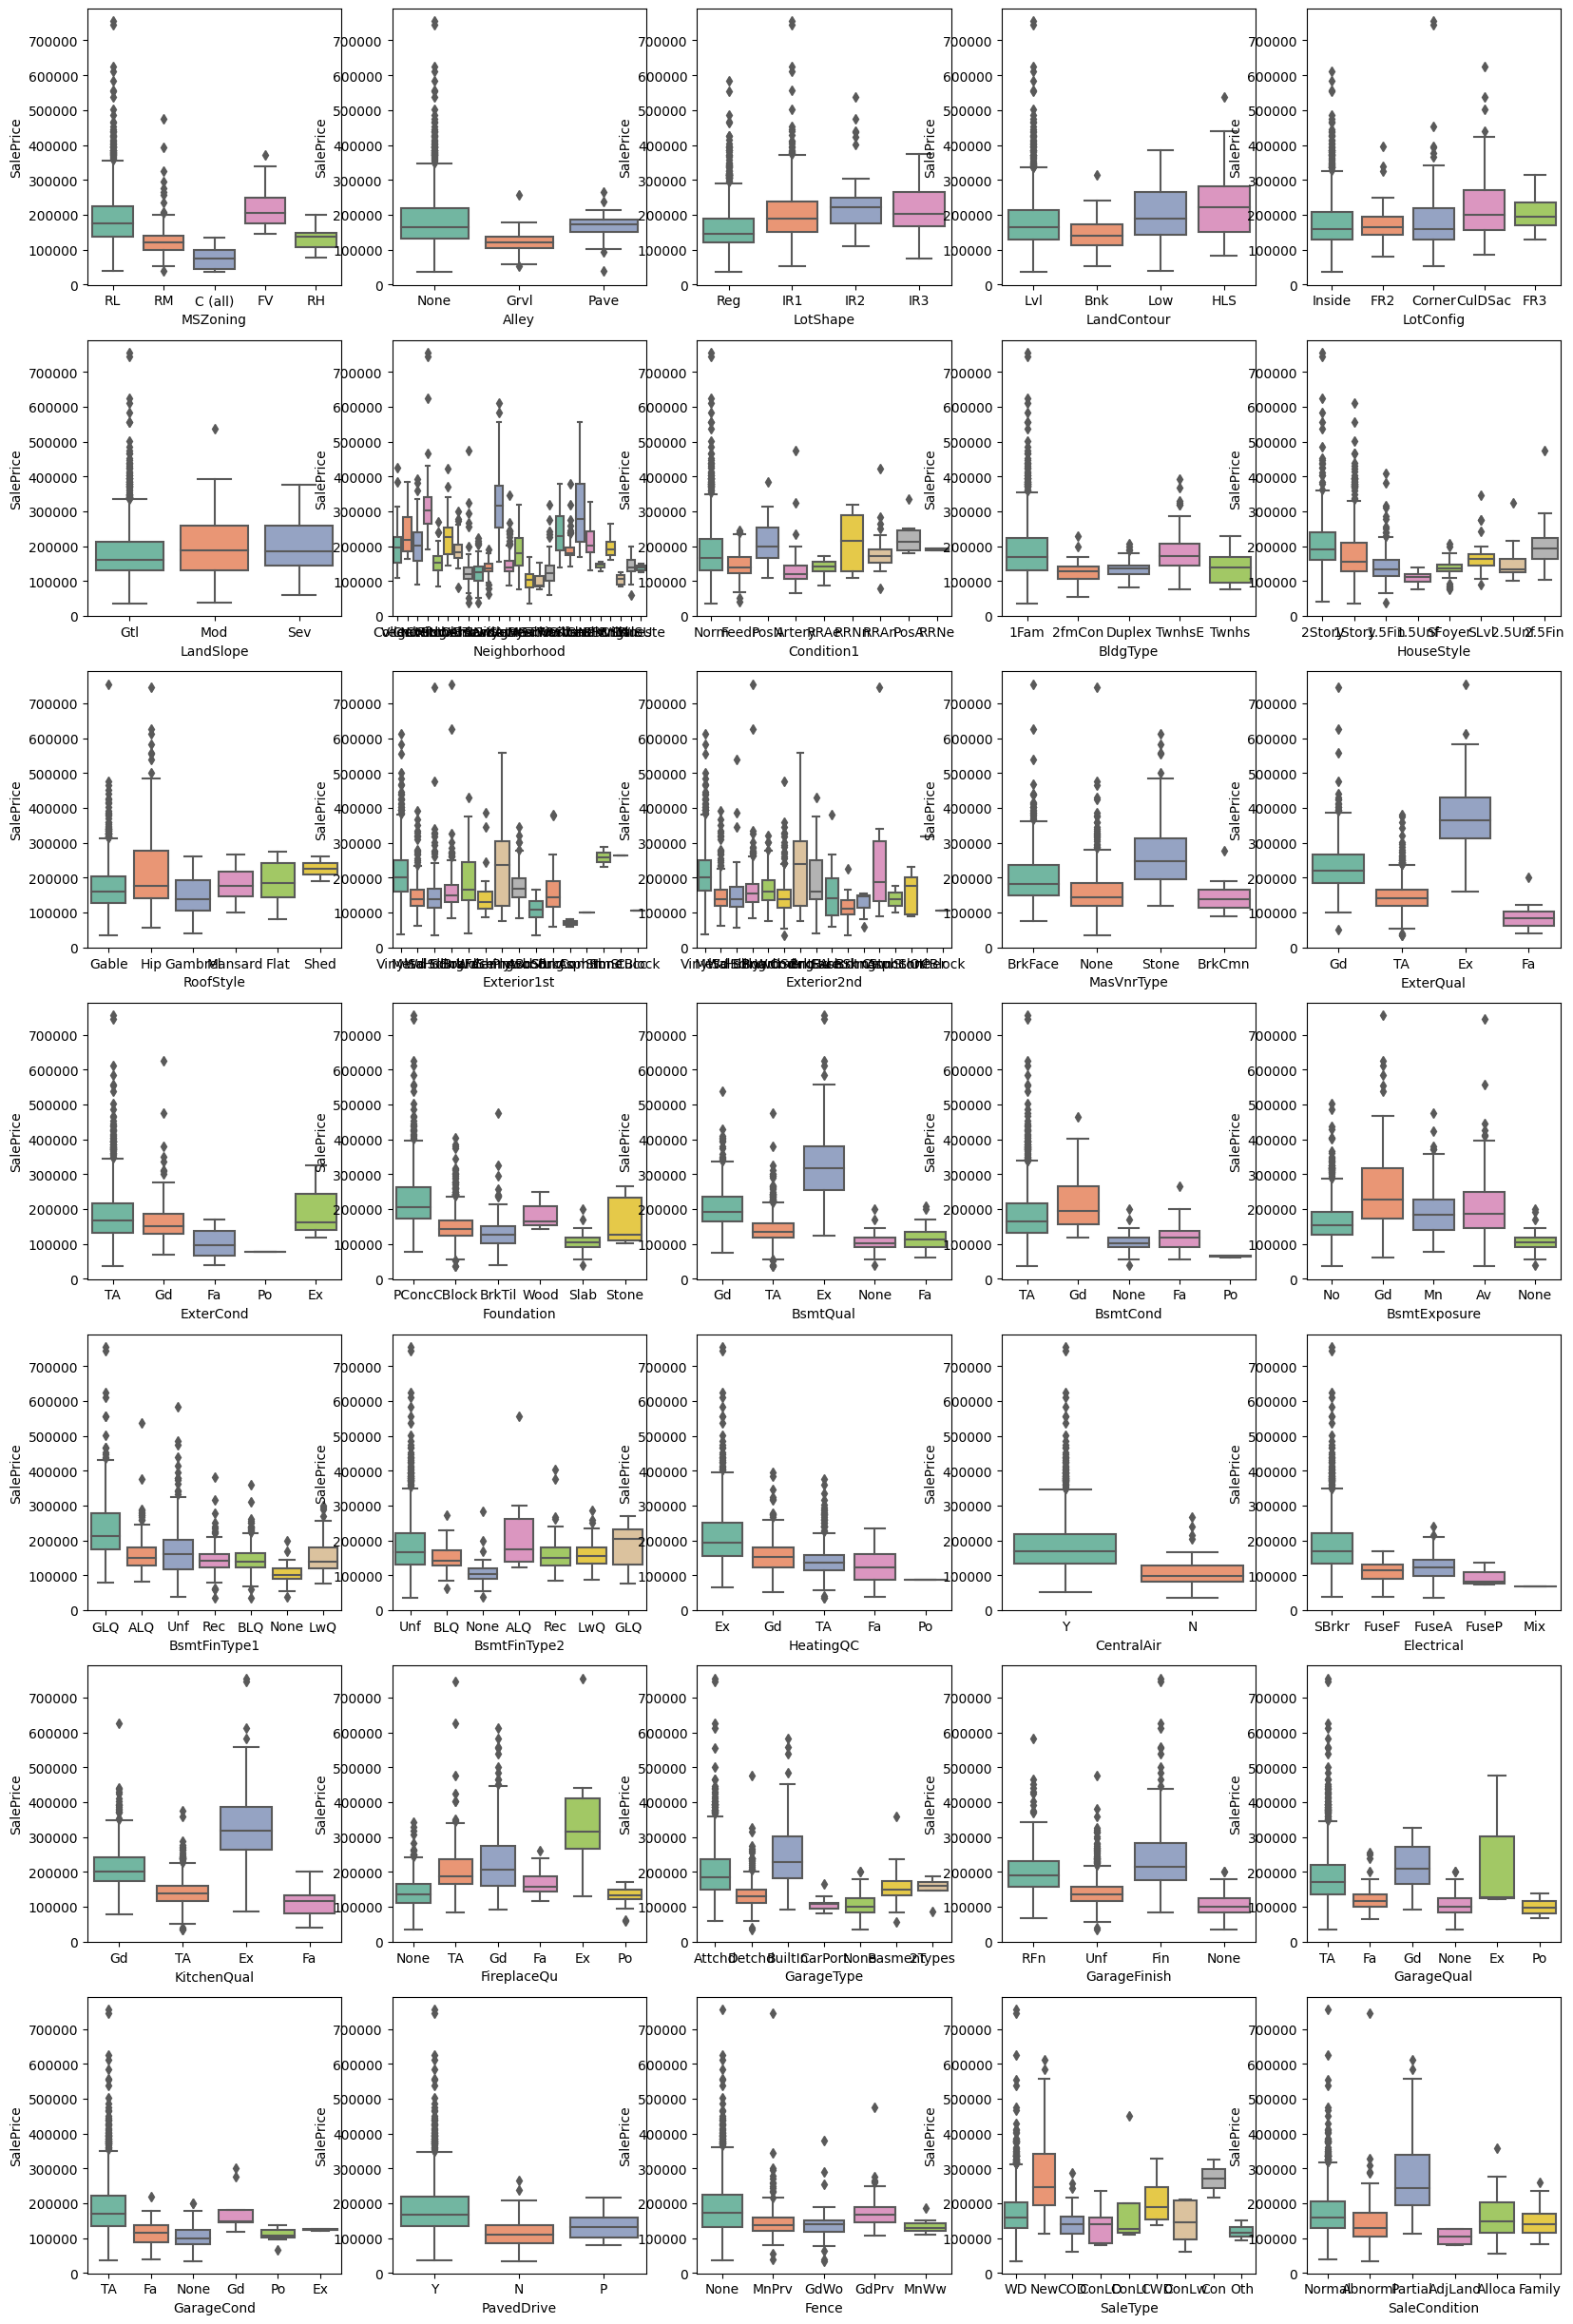

In [17]:
plt.figure(figsize = (20,40))
for i , columns in enumerate(categorical_data , start = 1):
    plt.subplot(9,5,i)
    sns.boxplot(x = columns ,y = 'SalePrice' ,data = train, palette = 'Set2')
plt.show()

> observe numerical data

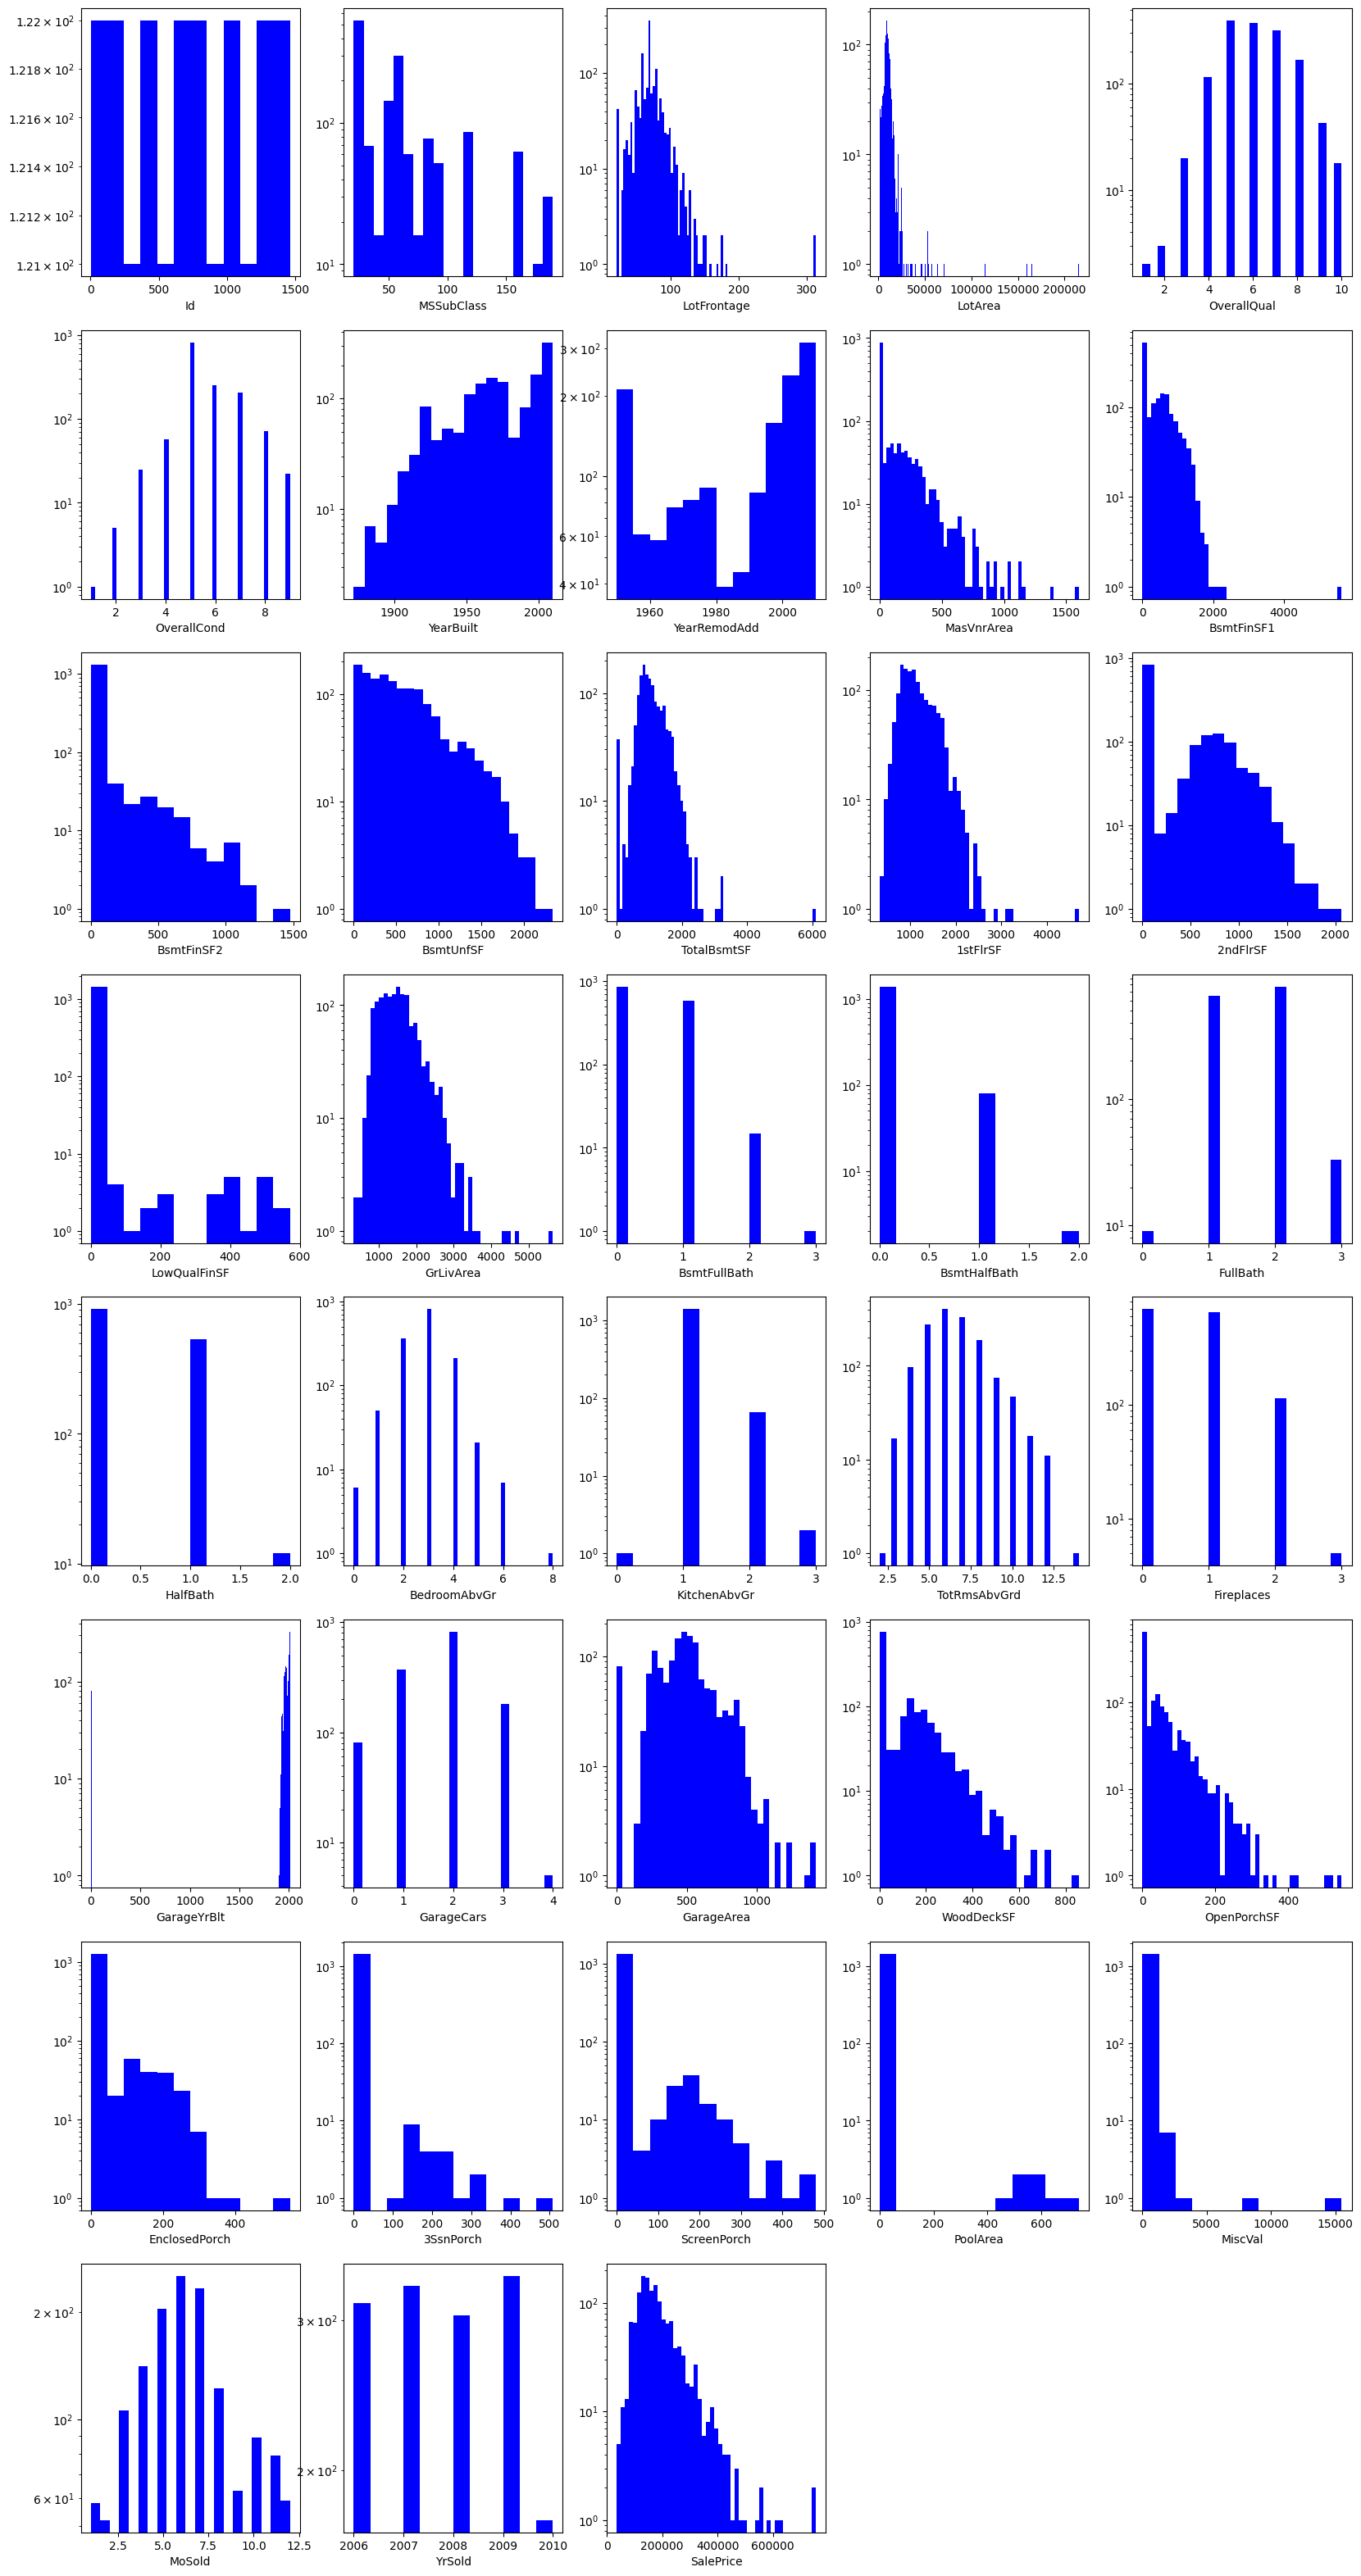

In [18]:
plt.figure(figsize = (20,40))
for i , columns in enumerate(numerical_data , start = 1):
    plt.subplot(8,5,i)
    plt.hist(x = columns ,bins = 'auto' , data = train ,color = 'blue')
    plt.xlabel(columns)
    plt.yscale('log')
plt.show()

In [19]:
train.drop(['Id'],axis = 1,inplace = True)
test.drop(['Id'],axis = 1,inplace = True)

3. Dealing with outliers

- The values exceeding the upper bound will be replaced by the upper bound value,then the values smaller than lower bound will be replaced by the lower bound

In [20]:
def outliers_solution(data):
    data = data.copy()
    Q3 = data.quantile(0.75)
    Q1 = data.quantile(0.25)
    IQR = Q3 - Q1
    #outliers bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    for i , j in enumerate(data):
        if j>upper_bound:
            data[i] = int(upper_bound)
        if j<lower_bound:
            data[i] = int(lower_bound)
    return data

In [21]:
numerical_data = [y for y in train.columns if train[y].dtype != 'object']
outlier = []
for i in numerical_data:
    train[i] = outliers_solution(train[i])

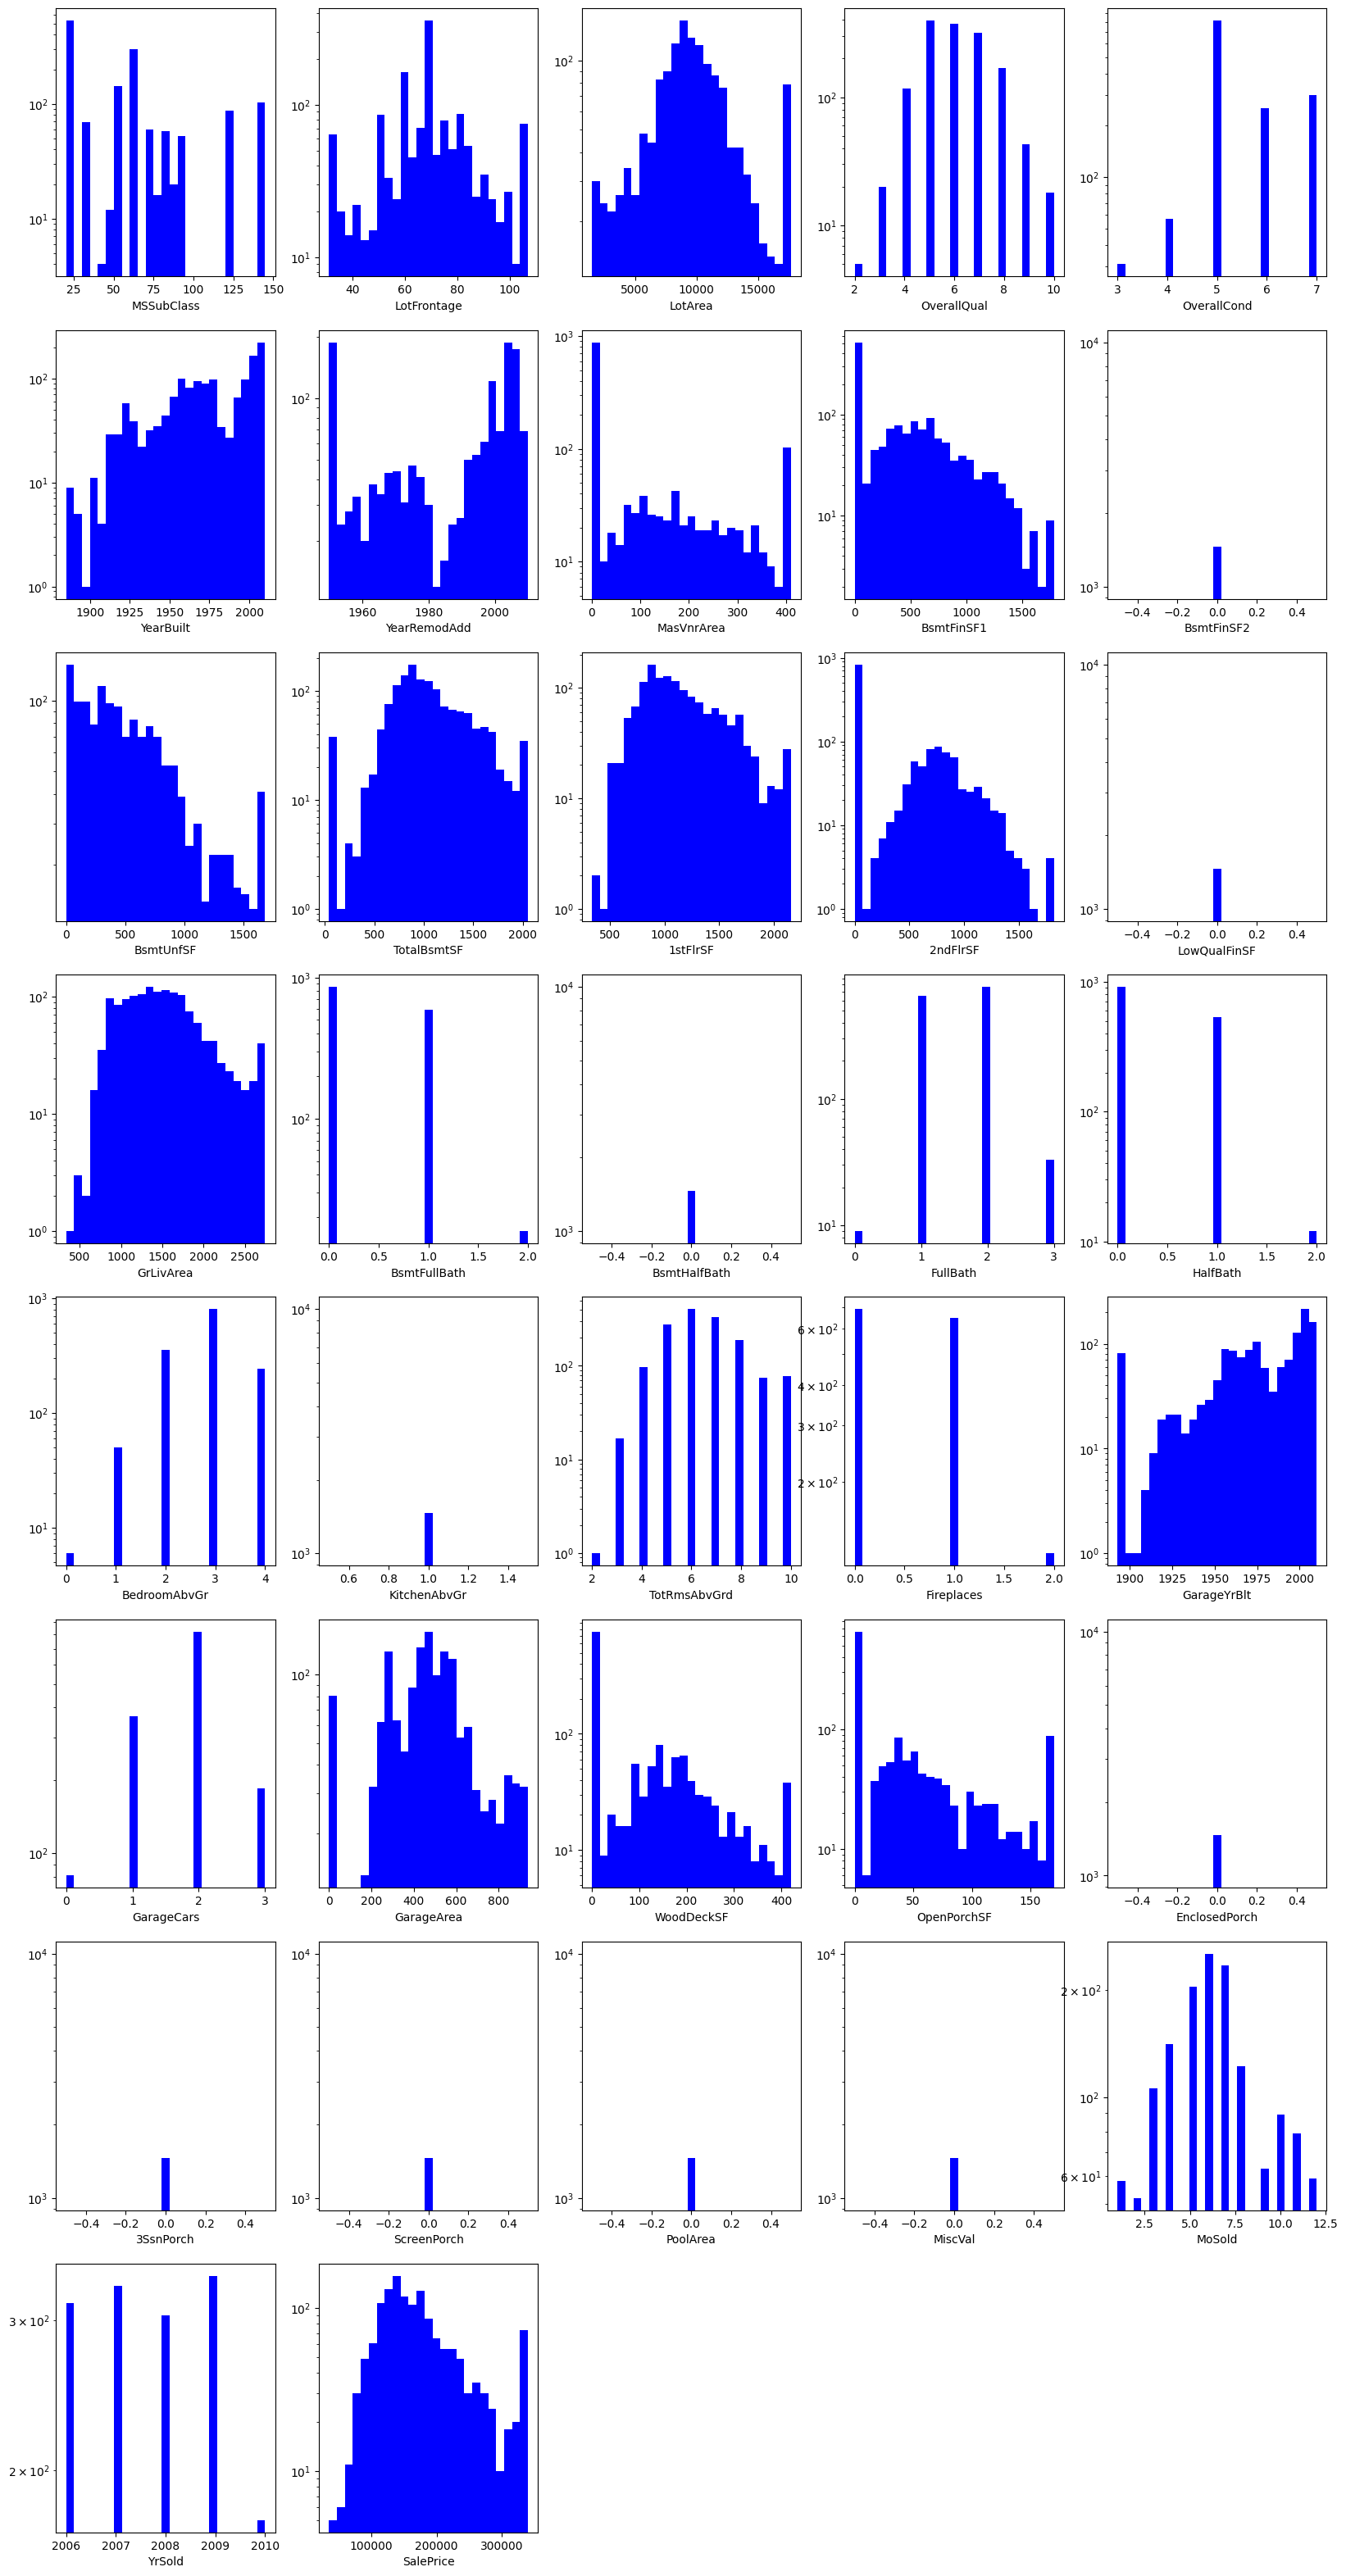

In [22]:
numerical_data = [y for y in train.columns if train[y].dtype != 'object']
plt.figure(figsize = (20,40))
for i , columns in enumerate(numerical_data , start = 1):
    plt.subplot(8,5,i)
    plt.hist(x = columns ,bins = 25 , data = train ,color = 'blue')
    plt.xlabel(columns)
    plt.yscale('log')
plt.show()

In [23]:
train.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
           'EnclosedPorch','3SsnPorch'
            ,'ScreenPorch','PoolArea','MiscVal'] , axis = 1,inplace = True)
test.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal'] , axis = 1,inplace = True)

4. label encoding for categorical data

In [24]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
for i in categorical_data:
    train[i] = label_en.fit_transform(train[i])
    test[i] = label_en.fit_transform(test[i])

5. observe correlation map

<Axes: >

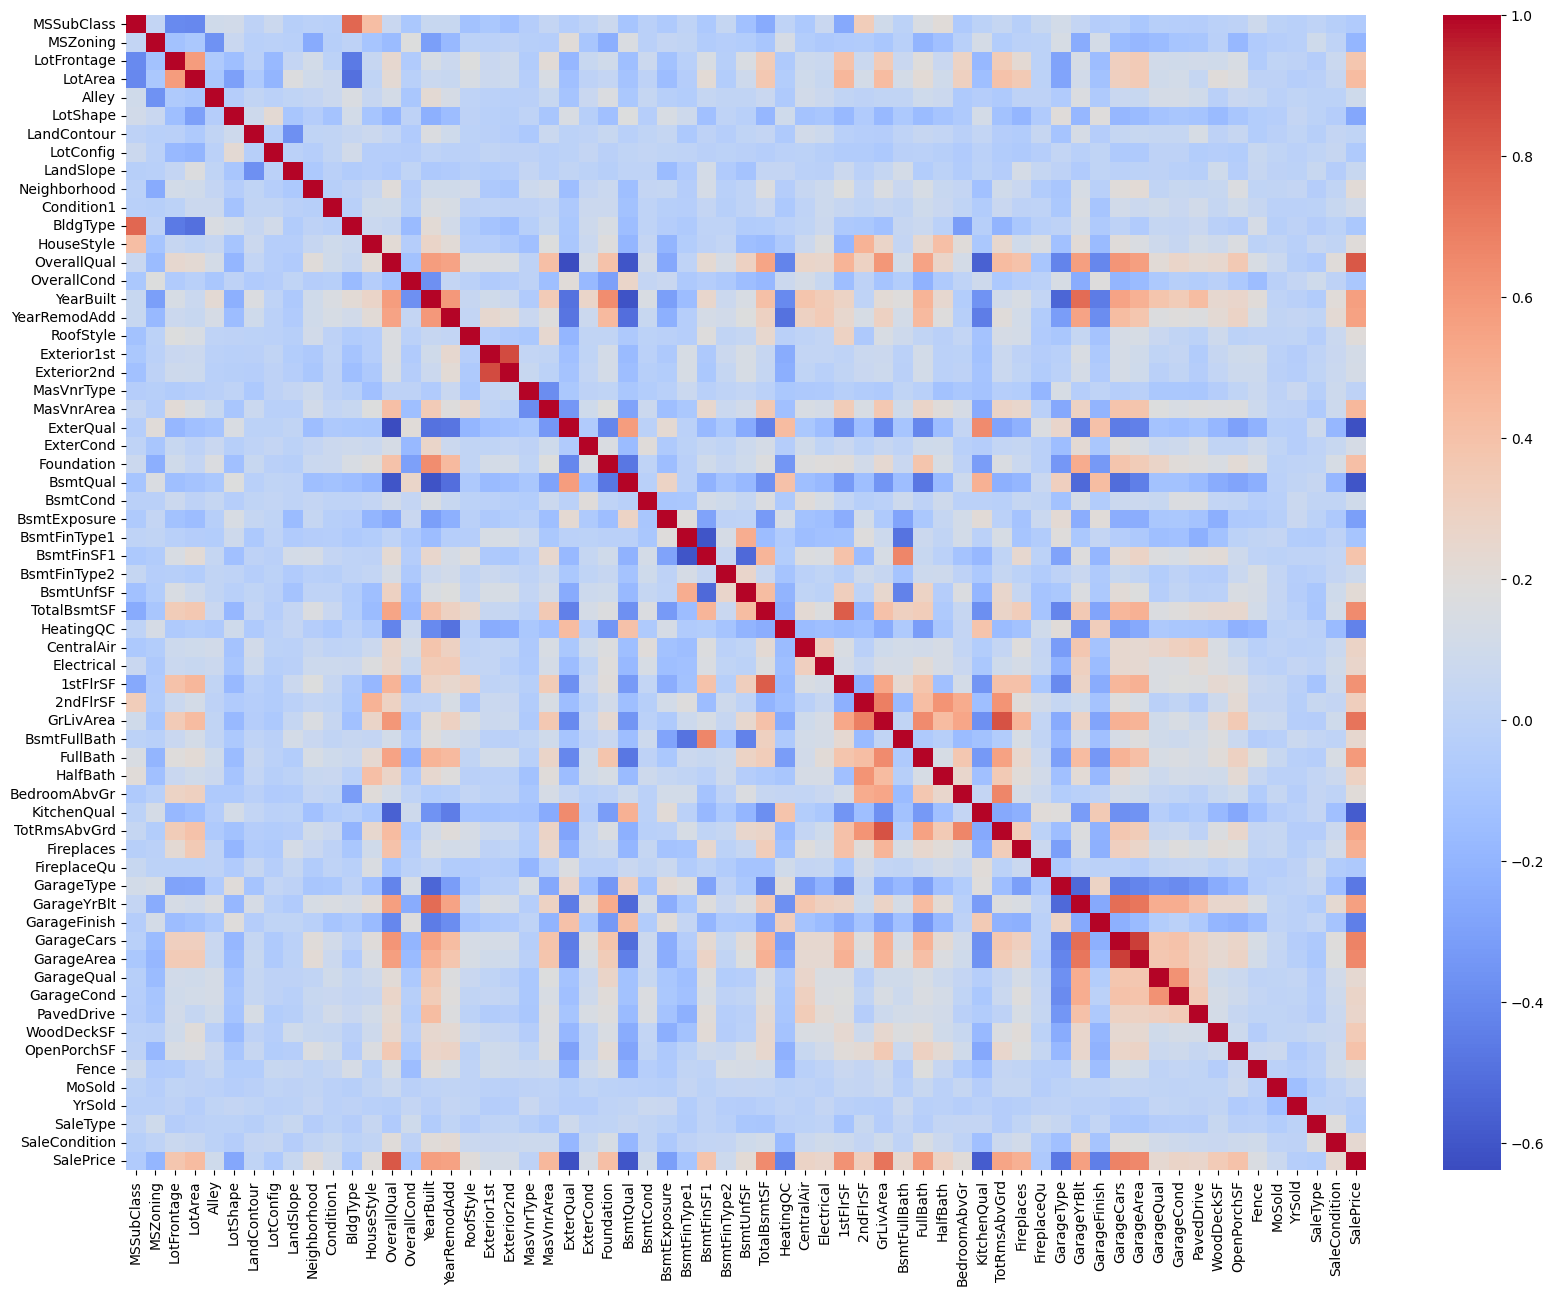

In [25]:
corrmap = train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corrmap , cmap = 'coolwarm')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  BldgType       1460 non-null   int64  
 12  HouseStyle     1460 non-null   int64  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  Exterior

In [27]:
# correlation_with_y = corrmap['SalePrice']
# high_correlation_positive = correlation_with_y[(correlation_with_y >= 0.4) & (correlation_with_y < 1.0)]
# high_correlation_negative = correlation_with_y[(correlation_with_y <= -0.4) & (correlation_with_y > -1.0)]
# print(high_correlation_positive)
# print(high_correlation_negative)

In [28]:
# train.drop(['MSSubClass','MSZoning','LotFrontage','LotArea','LotShape','LotConfig',
#            'Neighborhood','HouseStyle','OverallCond','Exterior1st','Exterior2nd',
#            'MasVnrType','MasVnrArea','Foundation','BsmtExposure','BsmtFinType1',
#            'BsmtFinSF1','BsmtUnfSF','HeatingQC','2ndFlrSF','BsmtFullBath','HalfBath',
#            'BedroomAbvGr','Fireplaces','FireplaceQu','GarageType','WoodDeckSF',
#            'OpenPorchSF','Fence','MoSold','YrSold'] , axis = 1,inplace = True)

In [29]:
# test.drop(['MSSubClass','MSZoning','LotFrontage','LotArea','LotShape','LotConfig',
#            'Neighborhood','HouseStyle','OverallCond','Exterior1st','Exterior2nd',
#            'MasVnrType','MasVnrArea','Foundation','BsmtExposure','BsmtFinType1',
#            'BsmtFinSF1','BsmtUnfSF','HeatingQC','2ndFlrSF','BsmtFullBath','HalfBath',
#            'BedroomAbvGr','Fireplaces','FireplaceQu','GarageType','WoodDeckSF',
#            'OpenPorchSF','Fence','MoSold','YrSold'] , axis = 1,inplace = True)

In [30]:
X = train.drop(['SalePrice'],axis = 1)
Y = train['SalePrice']

In [31]:
# # knn imputer
# from sklearn.impute import KNNImputer
# im = KNNImputer(n_neighbors = 5)
# X = im.fit_transform(X)

In [32]:
# test = im.transform(test)

In [33]:
# X = pd.DataFrame(X, columns=train.drop(['SalePrice'], axis=1).columns)
# train = pd.concat([X, Y], axis=1)
# test = pd.DataFrame(test, columns=train.drop(['SalePrice'], axis=1).columns)

# Model

1. train_test_split

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y, test_size = 0.2)

In [35]:
# X.columns

2. Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. XGBoost

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 
xgb_model = XGBRegressor()
param_search={
    'n_estimators':[300,400,500],
    'max_depth':[1,3,5],
    'learning_rate':[0.001,0.05,0.01,0.1],
    'gamma':[0.5,0.6,0.7],
    'subsample':[0.5,0.6,0.7],
    'min_child_weight':[0,5,10]
}
xgb_grid = GridSearchCV(xgb_model , param_search ,cv=3)
xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0.5, 0.6, 0.7],
                         'learning_rate': [0.001, 0.05, 0.01, 0.1],
                         'max_depth': [1, 3, 5], 'min_child_weight': [0, 5, 10],
                         'n_estimators': [300, 400, 500],
                         'subsample': [0.5, 0.6, 0.7]})

In [38]:
print('Best:',xgb_grid.best_params_)
print('Score:',xgb_grid.best_score_)

Best: {'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 500, 'subsample': 0.5}
Score: 0.9027091704952898


In [39]:
from sklearn.metrics import r2_score
predict = xgb_grid.predict(x_test)
score = r2_score(y_test , predict)
print('Score:',score)

Score: 0.9431579764284951


# Submit

In [40]:
submit = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
test_predict = xgb_grid.predict(test)
submit.SalePrice = test_predict
submit.to_csv('submission.csv', index = False)
submit.head()

,Id,SalePrice
0,1461,133881.968750
1,1462,169248.906250
2,1463,185595.437500
3,1464,193311.078125
4,1465,182699.062500
